In [1]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pandas as pd


In [2]:

df = pd.read_csv('../../data/data_daily_with_aqi.csv')
df.set_index(pd.DatetimeIndex(df['date']), inplace=True)
target = 'AQI' # PM2.5_24h, NO2_24h, O3_24h, CO_24h, SO2_24h, NO2_24h
city ='北京'
df_tgt = df[df.type==target].drop('type',axis=1)
df_tgt_ct = df_tgt[['date',city]].rename(columns={'date':'ds',city:'y'})
df_tgt_ct = df_tgt_ct.dropna()

In [3]:
y = df_tgt_ct.resample('M').mean()

In [4]:
y = y.reset_index(drop=True)

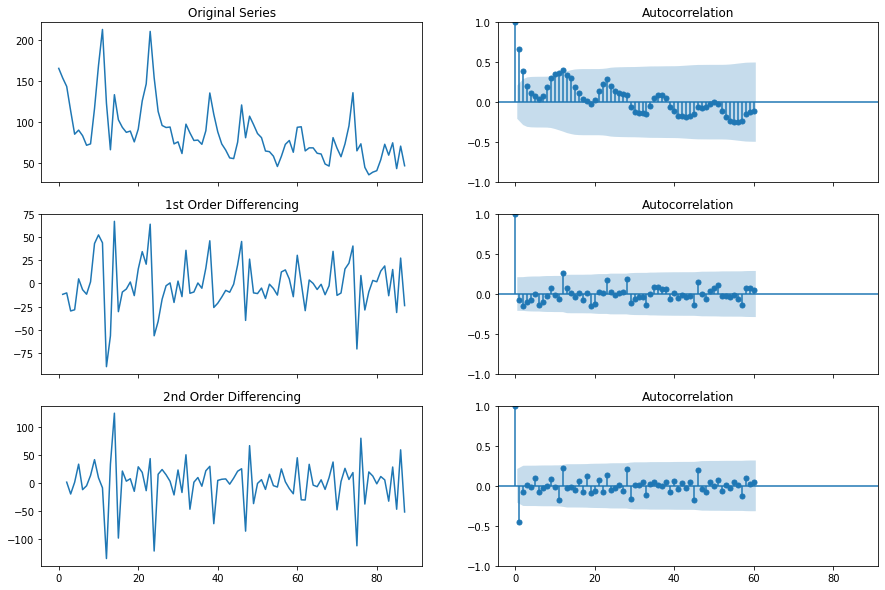

In [5]:
# Original Series
fig, axes = plt.subplots(3, 2, figsize=(15,10),sharex=True)
axes[0, 0].plot(y); axes[0, 0].set_title('Original Series')
plot_acf(y, ax=axes[0, 1],lags=60)

# 1st Differencing
axes[1, 0].plot(y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y.diff().dropna(), ax=axes[1, 1],lags=60)

# 2nd Differencing
axes[2, 0].plot(y.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y.diff().diff().dropna(), ax=axes[2, 1],lags=60)

plt.show()

In [6]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(y, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   88
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -403.229
Date:                Mon, 16 May 2022   AIC                            814.458
Time:                        22:51:00   BIC                            824.321
Sample:                             0   HQIC                           818.430
                                 - 88                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4323      0.153      2.825      0.005       0.132       0.732
ma.L1         -0.6932      0.201     -3.443      0.001      -1.088      -0.299
ma.L2         -0.2106      0.150     -1.406      0.1

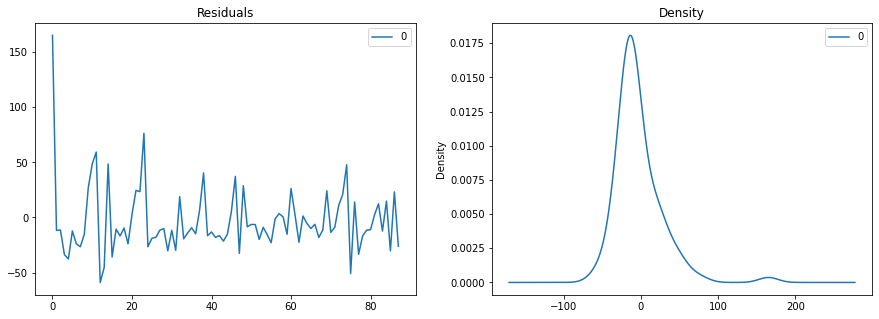

In [7]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,figsize=(15,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()